In [40]:
import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image

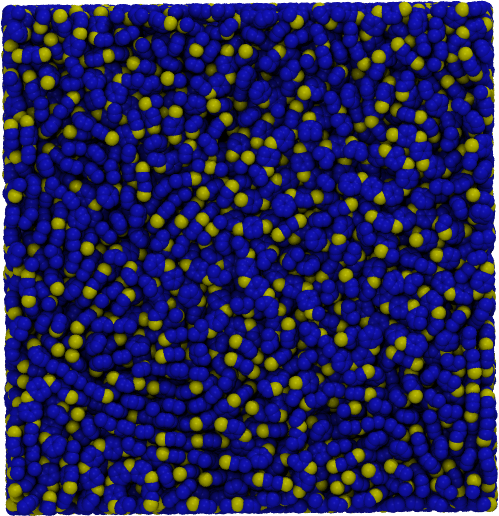

In [41]:
Image("init-slab.png")

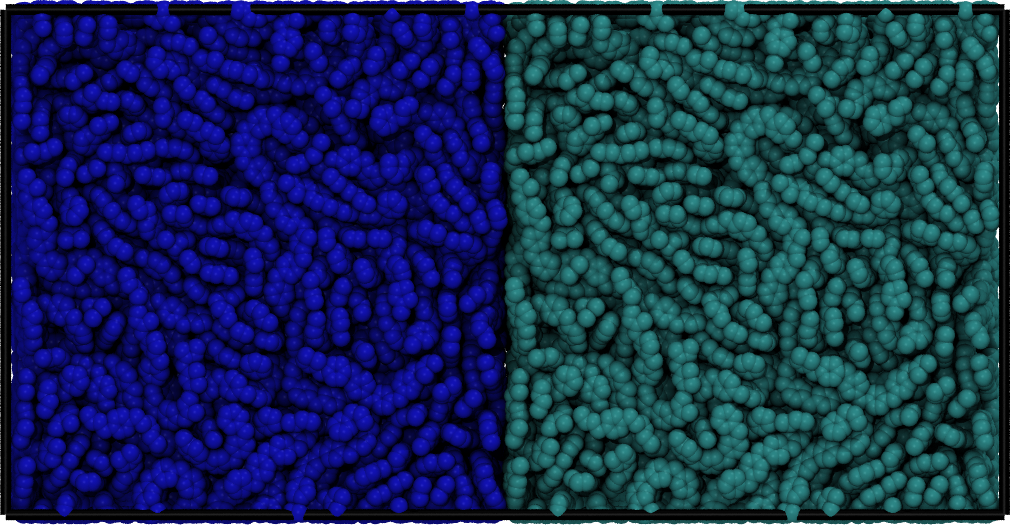

In [22]:
Image("weld0.png")

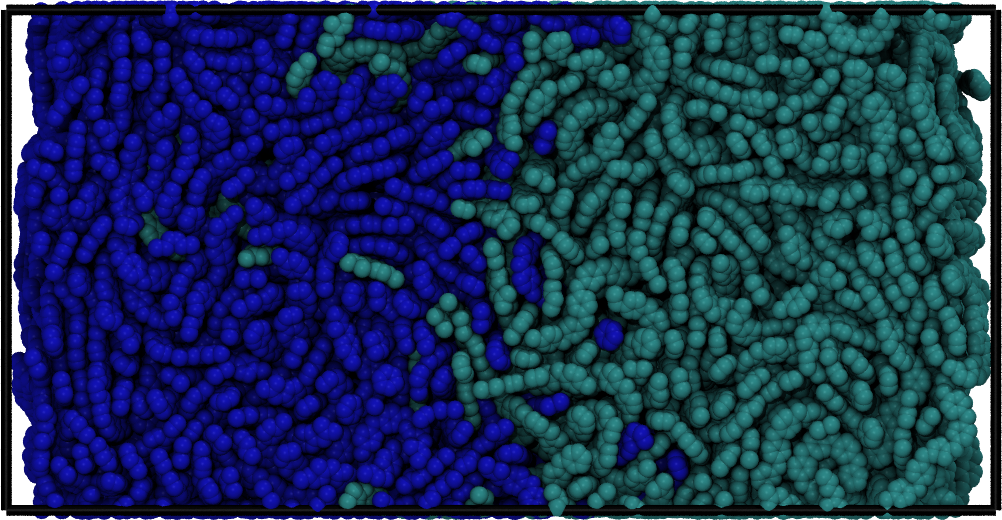

In [18]:
Image("tensile0.png")

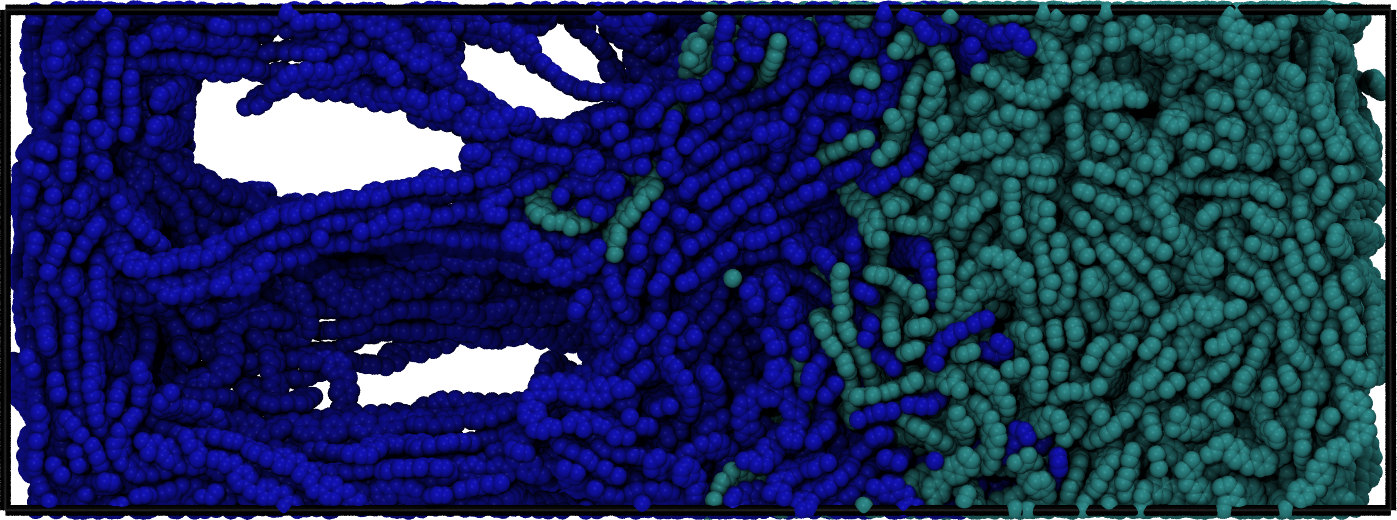

In [19]:
Image("tensile1.png")

In [ ]:
# Setting initial condititions
chains = Polymer(num_mols=100, lengths=50)
system = Pack(molecules=chains, density=1.2)
system.apply_forcefield(force_field=OPLS_AA, r_cut=2.5, auto_scale=True)

# Making a slab
slab_sim = SlabSimulation.from_system(system=system, interface_axis=(1, 0, 0))
slab_sim.run_NVT(n_steps=2e4, tau_kt=100*slab_sim.dt, kT=4.0)
weld_sim.save_restart.gsd("slab.gsd")

# Making a welded interface
interface = Interface(gsd_files=["slab.gsd"], gap=0.1, interface_axis=(1, 0, 0))
weld_sim = WeldSimulation(initial_state=interface.hoomd_snapshot, forcefield=system.hoomd_forces)
weld_sim.run_NVT(n_steps=2e4, tau_kt=100*weld_sim.dt, kT=4.0)
weld_sim.save_restart.gsd("weld.gsd")

# Tensile Testing
tensile_sim = Tensile(initial_state="weld.gsd", forcefield=system.hoomd_forces)
tensile_sim.run_tensile(strain=0.50, kT=2.0)

# Polyvinylidene Fluoride (PVDF)

https://en.wikipedia.org/wiki/Polyvinylidene_fluoride

>It is available in the form of piping products, sheet, tubing, films, plate and an insulator for premium wire. It can be injected, molded or welded and is commonly used in the chemical, semiconductor, medical and defense industries

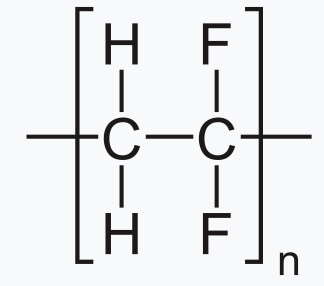

In [2]:
Image("pvdf.png")

# Using mBuild:

In [ ]:
import mbuild as mb
from mbuild.lib.recipes import Polymer as mbPolymer

In [24]:
smiles = "C-C(F)F"
pvdf = mb.load(smiles, smiles=True)
pvdf.visualize(backend="py3Dmol")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [43]:
poly_pvdf = mbPolymer()
poly_pvdf.add_monomer(compound=pvdf, indices=[4, -1], replace=True, separation=0.145)
poly_pvdf.build(n=5)
poly_pvdf.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Back in FlowerMD:

In [8]:
from flowermd.base import Polymer

class PVDF(Polymer):
    """Polyvinylidene Fluoride"""
    def __init__(self, lengths, num_mols):
        smiles = "C-C(F)F"
        bond_indices = [4, -1]
        bond_length = 0.145
        bond_orientation = [None, None]
        super(PVDF, self).__init__(
            lengths=lengths,
            num_mols=num_mols,
            smiles=smiles,
            bond_indices=bond_indices,
            bond_length=bond_length,
            bond_orientation=bond_orientation
        )

In [10]:
pvdf = PVDF(num_mols=[10, 10], lengths=[20, 5])
pvdf.molecules[0].visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
from flowermd.library.forcefields import GAFF
from flowermd.base import Pack
from flowermd.utils import get_target_box_mass_density

In [12]:
pvdf = PVDF(num_mols=[10, 10], lengths=[20, 10])
system = Pack(molecules=pvdf, density=1.5)
system.apply_forcefield(force_field=GAFF(), r_cut=2.5, auto_scale=True)

No charged group detected, skipping electrostatics.


In [14]:
from flowermd.modules.welding import SlabSimulation

In [32]:
slab_sim = SlabSimulation.from_system(system=system, interface_axis=(1, 0, 0))

Initializing simulation state from a gsd.hoomd.Frame.


In [33]:
slab_sim.interface_axis

array([1, 0, 0])

In [31]:
slab_sim.forces

In [ ]:
target_box = get_target_box_mass_density(
    mass=system.mass.to("g"),
    density=system.density
)

slab_sim.run_update_volume(
    n_steps=2e4,
    final_box_lengths=target_box,
    kT=6.0,
    tau_kt=100*slab_sim.dt,
    period=100
)

slab_sim.run_NVT(n_steps=2e4, tau_kt=100*slab_sim.dt, kT=4.0)

slab_sim.pickle_forcefield()

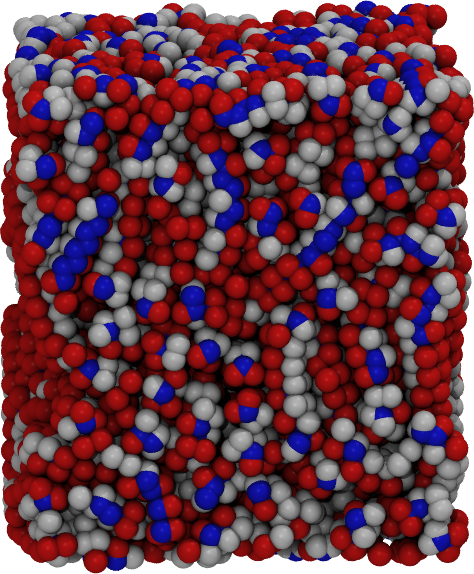

In [10]:
Image("pvdf-slab.png")

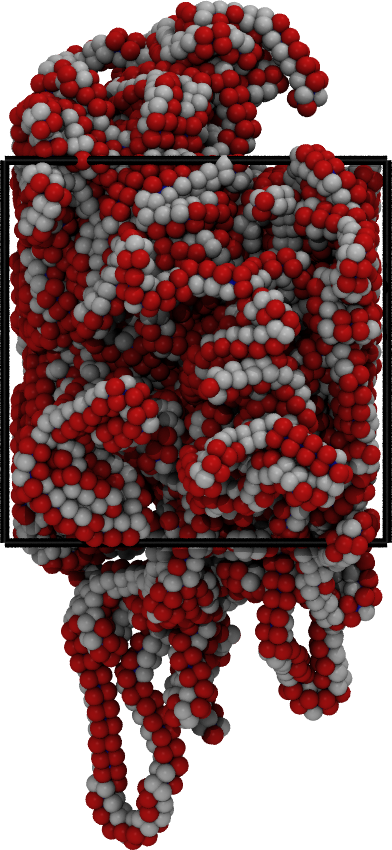

In [11]:
Image("pvdf-slab1.png")

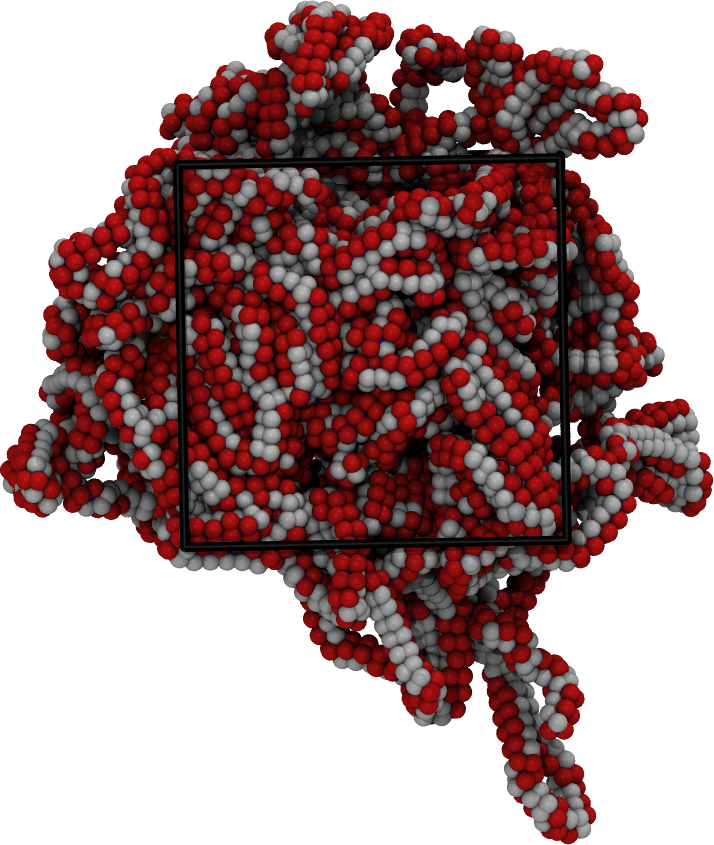

In [12]:
Image("pvdf-slab2.png")

In [36]:
import pickle
import gsd
from flowermd.modules.welding import Interface, WeldSimulation

In [37]:
interface = Interface(gsd_files=["trajectory.gsd"], gap=0.1, interface_axis=(1, 0, 0),)

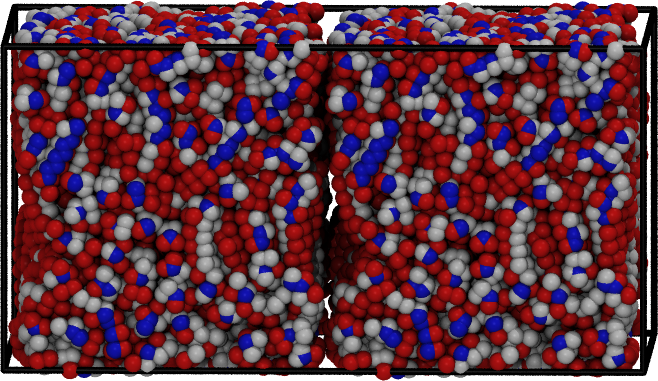

In [38]:
Image("interface.png")

In [ ]:
weld_sim = WeldSimulation(initial_state=interface.hoomd_snapshot, forcefield=

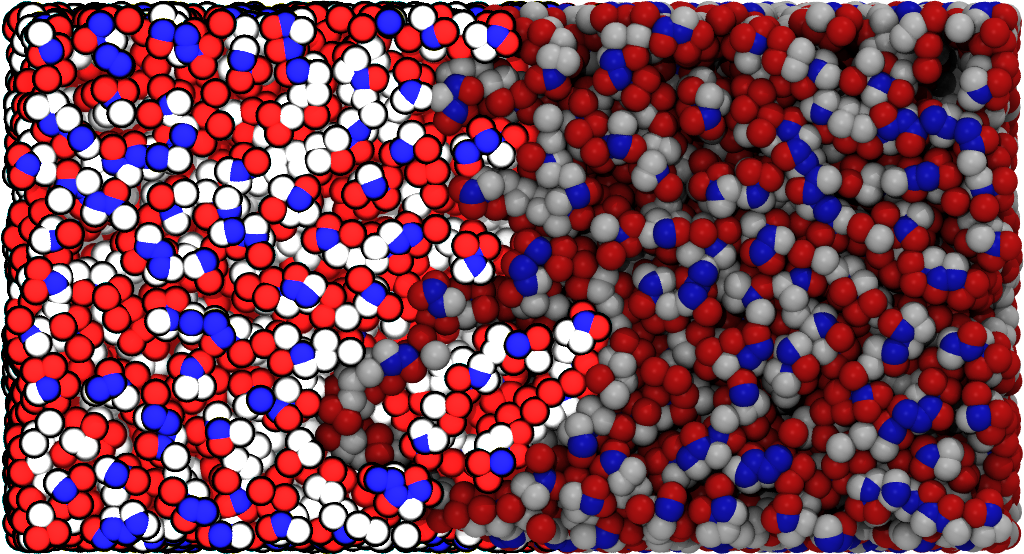

In [44]:
Image("pvdf-weld.png")

# Summary

In [ ]:
pvdf = PVDF(num_mols=[10, 10], lengths=[20, 10])
system = Pack(molecules=pvdf, density=1.5)
system.apply_forcefield(force_field=GAFF(), r_cut=2.5, auto_scale=True)

# Create our slab
slab_sim = SlabSimulation.from_system(system=system, interface_axis=(1, 0, 0))
slab_sim.run_NVT(n_steps=2e4, tau_kt=100*slab_sim.dt, kT=4.0)

# Save the final slab configuration and forcefield
slab_sim.save_restart_gsd("slab.gsd")
slab_sim.pickle_forcefield("pvdf_forces.pickle")

# Create the interface
interface = Interface(gsd_files=["slab.gsd"], gap=0.1, interface_axis=(1, 0, 0))
weld_sim = WeldSimulation(initial_state=interface.hoomd_snapshot, forcefield=hoomd_forces)
weld_sim.run_NVT(n_steps=2e4, tau_kt=100*weld_sim.dt, kT=4.0)